In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../data/all_data.csv', sep=';')
data.head()

,mid,Act1A1,Act1A2,Act2A1,Act2A2,ReasA1,ReasA2,REA1,REA2,NumTA1,...,T3TyA1,T3TyA2,T3SubjA1,T3SubjA2,sender,date,message_id,subject,body,folder
0,103944,greet,greet,{},{},personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<13973474.1075847200439.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,Tanya_Jones_Dec2000Notes FoldersSent
1,33081,deliver,request,{},{},administrative procedure,internal collaboration,accountable non-answer,postponed reply,1,...,NaN,NaN,{},{},richard.b.sanders@enron.com,2001-02-28,<7857698.1075853272620.JavaMail.evans@thyme>,Re: HEOF,"Frankly, I don t remember it. Ask Linda.\tAndr...",Richard_Sanders_Oct2001Notes FoldersSent
2,103941,deliver,deliver,{},propose,personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<10528202.1075847200508.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,"It s really all Genia s fault, she goes to lun...",Tanya_Jones_Dec2000Notes FoldersSent
3,103860,deliver,remind,{},{},administrative procedure,legal procedure,immediate reply,immediate reply,1,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-18,<23700686.1075847202393.JavaMail.evans@thyme>,Re: EnronOnline LLC and Enron North America Corp.,JustinI ve been running around trying to deter...,Tanya_Jones_Dec2000Notes FoldersSent
4,321253,commit,deliver,{},{},employment arrangements,personal,postponed reply,ignore,1,...,NaN,NaN,{},{},j.kaminski@enron.com,2001-07-23,<30497387.1075863431760.JavaMail.evans@thyme>,RE: Christian,"Paul, I hope you feel better. I have seen the ...","VKAMINS (Non-Privileged)Kaminski, Vince JSent ..."


In [2]:
# Keep only body and annotator 2 columns

annotator_two = data[['Act1A2', 'ReasA2', 'REA2', 'NumTA2', 'body']]
annotator_two.head()

,Act1A2,ReasA2,REA2,NumTA2,body
0,greet,personal,ignore,0,It was cute!\tGenia FitzGerald\t10/10/2000 03:...
1,request,internal collaboration,postponed reply,1,"Frankly, I don t remember it. Ask Linda.\tAndr..."
2,deliver,personal,ignore,0,"It s really all Genia s fault, she goes to lun..."
3,remind,legal procedure,immediate reply,2,JustinI ve been running around trying to deter...
4,deliver,personal,ignore,0,"Paul, I hope you feel better. I have seen the ..."


In [3]:
encoded_annotator_two = pd.get_dummies(annotator_two, columns=['Act1A2', 'ReasA2', 'REA2', 'NumTA2'])
encoded_annotator_two.head()

,body,Act1A2_amend,Act1A2_commit,Act1A2_deliver,Act1A2_greet,Act1A2_propose,Act1A2_refuse,Act1A2_remind,Act1A2_request,Act1A2_{},...,REA2_accountable non-answer,REA2_ignore,REA2_immediate reply,REA2_postponed reply,REA2_{},NumTA2_0,NumTA2_1,NumTA2_2,NumTA2_3,NumTA2_there is nothing in the message or subject that lets me know
0,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,"Frankly, I don t remember it. Ask Linda.\tAndr...",False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,"It s really all Genia s fault, she goes to lun...",False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,JustinI ve been running around trying to deter...,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
4,"Paul, I hope you feel better. I have seen the ...",False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [4]:
encoded_annotator_two.keys()

Index(['body', 'Act1A2_amend', 'Act1A2_commit', 'Act1A2_deliver',
       'Act1A2_greet', 'Act1A2_propose', 'Act1A2_refuse', 'Act1A2_remind',
       'Act1A2_request', 'Act1A2_{}', 'ReasA2_administrative procedure',
       'ReasA2_employment arrangements', 'ReasA2_external collaboration',
       'ReasA2_internal collaboration', 'ReasA2_legal procedure',
       'ReasA2_logistic arrangements', 'ReasA2_other', 'ReasA2_personal',
       'ReasA2_travel planning', 'ReasA2_{}', 'REA2_accountable non-answer',
       'REA2_ignore', 'REA2_immediate reply', 'REA2_postponed reply',
       'REA2_{}', 'NumTA2_0', 'NumTA2_1', 'NumTA2_2', 'NumTA2_3',
       'NumTA2_there is nothing in the message or subject that lets me know'],
      dtype='object')

In [10]:
clean_encoded_annotator_two = encoded_annotator_two.drop(['Act1A2_{}', 'ReasA2_{}', 'REA2_{}',
                                                           'NumTA2_there is nothing in the message or subject that lets me know'], axis=1)
clean_encoded_annotator_two.keys()

Index(['body', 'Act1A2_amend', 'Act1A2_commit', 'Act1A2_deliver',
       'Act1A2_greet', 'Act1A2_propose', 'Act1A2_refuse', 'Act1A2_remind',
       'Act1A2_request', 'ReasA2_administrative procedure',
       'ReasA2_employment arrangements', 'ReasA2_external collaboration',
       'ReasA2_internal collaboration', 'ReasA2_legal procedure',
       'ReasA2_logistic arrangements', 'ReasA2_other', 'ReasA2_personal',
       'ReasA2_travel planning', 'REA2_accountable non-answer', 'REA2_ignore',
       'REA2_immediate reply', 'REA2_postponed reply', 'NumTA2_0', 'NumTA2_1',
       'NumTA2_2', 'NumTA2_3'],
      dtype='object')

In [11]:
clean_encoded_annotator_two.head()

,body,Act1A2_amend,Act1A2_commit,Act1A2_deliver,Act1A2_greet,Act1A2_propose,Act1A2_refuse,Act1A2_remind,Act1A2_request,ReasA2_administrative procedure,...,ReasA2_personal,ReasA2_travel planning,REA2_accountable non-answer,REA2_ignore,REA2_immediate reply,REA2_postponed reply,NumTA2_0,NumTA2_1,NumTA2_2,NumTA2_3
0,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
1,"Frankly, I don t remember it. Ask Linda.\tAndr...",False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,"It s really all Genia s fault, she goes to lun...",False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
3,JustinI ve been running around trying to deter...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,"Paul, I hope you feel better. I have seen the ...",False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False


In [12]:
count_columns = {}
for series_name, series in clean_encoded_annotator_two.items():
    count_columns[series_name] = series.sum()

count_columns.pop('body')

count_columns

{'Act1A2_amend': 42,
 'Act1A2_commit': 50,
 'Act1A2_deliver': 477,
 'Act1A2_greet': 93,
 'Act1A2_propose': 116,
 'Act1A2_refuse': 12,
 'Act1A2_remind': 77,
 'Act1A2_request': 275,
 'ReasA2_administrative procedure': 246,
 'ReasA2_employment arrangements': 32,
 'ReasA2_external collaboration': 57,
 'ReasA2_internal collaboration': 459,
 'ReasA2_legal procedure': 52,
 'ReasA2_logistic arrangements': 35,
 'ReasA2_other': 59,
 'ReasA2_personal': 178,
 'ReasA2_travel planning': 22,
 'REA2_accountable non-answer': 481,
 'REA2_ignore': 139,
 'REA2_immediate reply': 263,
 'REA2_postponed reply': 250,
 'NumTA2_0': 551,
 'NumTA2_1': 532,
 'NumTA2_2': 52,
 'NumTA2_3': 8}

([<matplotlib.axis.XTick at 0x2654f49c950>,
 [Text(0, 0, 'Act1A2_amend'),
  Text(1, 0, 'Act1A2_commit'),
  Text(2, 0, 'Act1A2_deliver'),
  Text(3, 0, 'Act1A2_greet'),
  Text(4, 0, 'Act1A2_propose'),
  Text(5, 0, 'Act1A2_refuse'),
  Text(6, 0, 'Act1A2_remind'),
  Text(7, 0, 'Act1A2_request'),
  Text(8, 0, 'ReasA2_administrative procedure'),
  Text(9, 0, 'ReasA2_employment arrangements'),
  Text(10, 0, 'ReasA2_external collaboration'),
  Text(11, 0, 'ReasA2_internal collaboration'),
  Text(12, 0, 'ReasA2_legal procedure'),
  Text(13, 0, 'ReasA2_logistic arrangements'),
  Text(14, 0, 'ReasA2_other'),
  Text(15, 0, 'ReasA2_personal'),
  Text(16, 0, 'ReasA2_travel planning'),
  Text(17, 0, 'REA2_accountable non-answer'),
  Text(18, 0, 'REA2_ignore'),
  Text(19, 0, 'REA2_immediate reply'),
  Text(20, 0, 'REA2_postponed reply'),
  Text(21, 0, 'NumTA2_0'),
  Text(22, 0, 'NumTA2_1'),
  Text(23, 0, 'NumTA2_2'),
  Text(24, 0, 'NumTA2_3')])

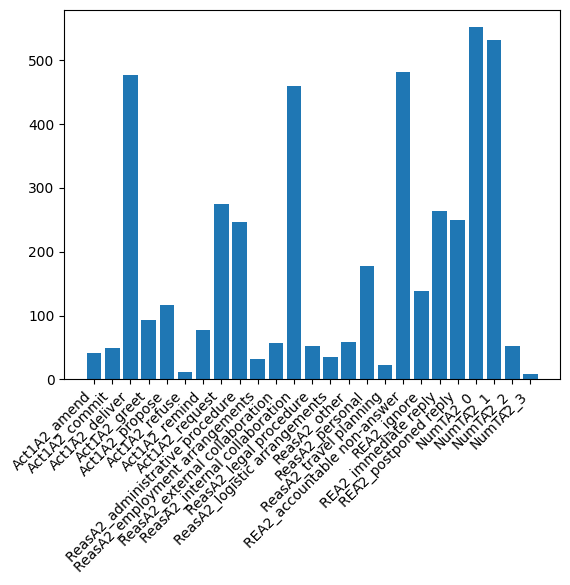

In [13]:
# plot the count of each category

plt.bar(range(len(count_columns)), list(count_columns.values()), align='center')
plt.xticks(range(len(count_columns)), list(count_columns.keys()), rotation=45, ha='right')


In [14]:
# save to csv

clean_encoded_annotator_two.to_csv('../data/annotator_two_hot_encoded.csv', index=False)